# NumPy

Ejecutar este documento en forma dinámica: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/manuxch/intro2prog/master?filepath=numpy/numpy.ipynb)

## Introducción

NumPy es un paquete de **_Scipy_**. Comentaremos brevemente cómo está compuesto Scipy para que se comprenda la potencialidad y el contexto de esta herramienta. Luego profundizaremos en NumPy.

[Scipy](https://www.scipy.org/) es un acrónimo de "Scientific Computing Tools for Python" y se basa en los siguientes paquetes:

- Python.

- [NumPy](http://www.numpy.org/), diseñado para computación científica es su paquete principal para cálculo numérico. Define arreglos numéricos, matrices y operaciones básicas con éstos.

- La [librería Scipy](https://www.scipy.org/scipylib/index.html), es una colección de algoritmos numéricos que incluyen: procesamiento de señales, optimización, estadística, procesamiento de imágenes, etc.

- [Matplotlib](https://matplotlib.org/), paquete para visualización con calidad de publicación. Existen otros paquetes para visualización (una introducción en [GMGcode](https://github.com/manuxch/GMGCode)).

También incluye otros paquetes especializados. Algunos de ellos son:

- [pandas](https://pandas.pydata.org/), provee herramientas para el manejo sencillo de datos y estructuras de datos.

- [SymPy](http://www.sympy.org/), para cálculo algebráico y matemática simbólica.

- [scikit-image](http://scikit-image.org/) es una colección de algoritmos para procesamiento de imágenes.

- [h5py](http://www.h5py.org/) manejo de datos en formato [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).


## Ahora si, NumPy

### Instalación
Primero se debe _instalar_, para esto ver las instrucciones [aquí](https://scipy.org/install.html). Es recomendable hacerlo directamente de repositorios debian, ubuntu, etc. de tal manera que se instalen correctamente las dependencias. Como [ya lo hemos mencionado](https://nbviewer.jupyter.org/github/manuxch/intro2prog/blob/master/intro/intro.ipynb), existen distribuciones de Python que instalan por defecto todas las herramientas necesarias (ejemplo: Anaconda).

### Aspectos básicos
El objeto principal de NumPy es un arreglo multidimensional homogéneo. Es una tabla de elementos (números del mismo tipo) indexados como una lista (o tupla) de enteros positivos.
Por ejemplo:

In [5]:
import numpy as np #importo numpy y lo denomino np
a = np.array([(1,2,3), (4,5,6)])
print(a,type(a))

[[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'>


Lo primero que hicimos fue importar el módulo NumPy como una variable de nombre _np_, esta es una variable del tipo módulo (<type 'module'>). A esta variable la usaremos para llamar todas las funciones y objetos que tiene NumPy. En el ejemplo anterior accedimos a la clase array (se llama ndarray) como _np.array_. 

En NumPy se denomina _axes_ a las dimensiones. En la variable _"a"_ hemos guardado un arreglo que tiene dos ejes (axes), el primero tiene longitud 2 y el segundo 3.

La clase _ndarray_ tiene varios atributos. Algunos de ellos son:

In [3]:
#ndarray.ndim
ndimensiones = a.ndim
print('Tiene dos axes:',ndimensiones)

#ndarray.shape
forma = a.shape
print('Indica la dimensión de cada eje en una tupla:',forma)
print(type(forma))
forma[1]#Se puede acceder al valor de cada elemento de la tupla.

#ndarray.size
tamanio = a.size
print('Cantidad de elementos que puede almacenar:',tamanio)

#ndarray.dtype
print('Tipo de dato dentro del arreglo "a":',a.dtype)
b = np.array([0,1,2])
print('Tipo de dato dentro del arreglo "b":',b.dtype)
a[1][2]

Tiene dos axes: 2
Indica la dimensión de cada eje en una tupla: (2, 3)
<class 'tuple'>
Cantidad de elementos que puede almacenar: 6
Tipo de dato dentro del arreglo "a": int64
Tipo de dato dentro del arreglo "b": int64


6

### Crear un arreglo

Existen varias formas de crear un arreglo NumPy:

1. Como hicimos antes, Python list o tuplas.
2. Usando funciones específicas de NumPy (ejemplos: _arange_, _linspace_, etc.).
3. Leer datos desde un archivo.


#### 1. Escribiendo los valores, desde listas o tuplas

Debe remarcarse que en los arreglos el tipo de elemento se determina cuando se crea el arreglo. En el ejemplo, la variable  _"a"_   es float64 porque puse algún número con coma, y _"b"_ es int64 porque los puse sin coma. También se puede especificar de la siguiente manera:

In [6]:
c = np.array([(2.+1.j,1),(0+2.j,1-1j)])#dtype=complex
print('c =\n',c)
print('Parte real:\n',c.real)
print('Parte imaginaria:\n',c.imag)
c.imag.dtype

c =
 [[ 2.+1.j  1.+0.j]
 [ 0.+2.j  1.-1.j]]
Parte real:
 [[ 2.  1.]
 [ 0.  1.]]
Parte imaginaria:
 [[ 1.  0.]
 [ 2. -1.]]


dtype('float64')

Algunos tipos de datos comunes son: int, float, complex, bool, object, etc.
Además, podemos definir el tamaño (cantindad de bits) con: int64, int16, float128, complex128.

Otra cosa que se puede hacer es convertir una lista a un NumPy array:

In [7]:
d = [2.1, 2.4, 2.3, 1.9]
dnp = np.asarray(d)
print('"d" es tipo:',type(d))
print('"dnp" es tipo:',type(dnp))
print(dnp.mean()) #método de la clase ndarray que calcula el promedio

"d" es tipo: <class 'list'>
"dnp" es tipo: <class 'numpy.ndarray'>
2.175


Otro ejemplo convirtiendo una lista (esta puede servir cuando debo cargar muchos datos):

In [8]:
e = []#inicializo una lista vacía
for n in range(0,30,5):
    e.append(n)
    
print(e)
print(type(e))
enp = np.asarray(e)
print(type(enp))
print(enp.shape)

[0, 5, 10, 15, 20, 25]
<class 'list'>
<class 'numpy.ndarray'>
(6,)


#### 2. Utilizando funciones de NumPy
Cuando debo escribir muchos números o inicializar un arreglo grande es conveniente usar funciones que tiene NumPy. 

- Ejemplos de creación de vectores:

In [12]:
#Función arange (pariente de range), cuidado el límite superior no está incluido
x = np.arange(0.0, 10.0, 0.5) # argumentos: start, stop, step
print('x:',x)
#Función linspace, ambos límites están incluidos
y = np.linspace(0, 10, 25)
print('y:',y,'step:',y[1]-y[0])
#Función logspace
pot1, pot2 = 2, 6
z = np.logspace(pot1, pot2, 5)#Aquí debo poner las potencias (10^pot1 10^pot2), puedo agregar también la base "base=e"
print(z)

x: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
y: [  0.           0.41666667   0.83333333   1.25         1.66666667
   2.08333333   2.5          2.91666667   3.33333333   3.75         4.16666667
   4.58333333   5.           5.41666667   5.83333333   6.25         6.66666667
   7.08333333   7.5          7.91666667   8.33333333   8.75         9.16666667
   9.58333333  10.        ] step: 0.416666666667
[  1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06]


- Ejemplos de creación de matrices:

Matrices de todos ceros o todos unos:

In [14]:
Ceros = np.zeros((2,2))
print(Ceros)
Unos = np.ones((3,3))
print(Unos)
Unosvec = np.ones(5)
print(Unosvec)

[[ 0.  1.]
 [ 0.  0.]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[ 1.  1.  1.  1.  1.]


También se pueden crear matrices/vectores copiando el tamaño de una matriz/vector determinado. Por ejemplo, si quisieramos un arreglo del tamaño del vector de _a_:

In [15]:
print(a)
Ceros_como_a = np.zeros_like(a)
print(Ceros_como_a)
Unos_como_a = np.ones_like(a)
print(Unos_como_a)


[[1 2 3]
 [4 5 6]]
[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]


Matrices diagonales:

In [16]:
#ndarray.diag
A = np.diag([1,2,3])
print(A)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


También se pueden crear otros tipos de matrices diagonales:

In [18]:
np.diag([1,2,3], k=-1)+np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [1, 0, 2, 0],
       [0, 2, 0, 3],
       [0, 0, 3, 0]])

También se pueden crear matrices o vectores aleatorios, para eso hay que utilizar la función random. Por ejemplo:

In [22]:
Aruido = np.random.rand(5,5)
print(Aruido)

[[ 0.38467138  0.32605662  0.44676622  0.01503075  0.87155507]
 [ 0.50614339  0.92055281  0.69986927  0.25380249  0.6580477 ]
 [ 0.39421131  0.58822594  0.5969594   0.29341432  0.83995531]
 [ 0.8134669   0.60843739  0.90135997  0.9508593   0.7970438 ]
 [ 0.727802    0.52115984  0.91597459  0.98445782  0.05483378]]


Note que en el ejemplo anterior llamamos la clase random que tiene un método llamado _rand_ que genera números aleatorios en el intervalo (0,1) con una distribución aproximadamente Uniforme.

Ahora si queremos generar datos con una distribución Normal Estandar (media cero y varianza uno) utilizamos la función _randn_:

In [30]:
k = np.random.randn(40)
#print(k)
print('Media muestral:',k.mean())
print('Varianza muestral:',(k.std())**2)

Media muestral: 0.100874333227
Varianza muestral: 1.04256753838


como se ve, calculamos media y varianza muestrales y dan parecidas a las poblacionales.

#### 3. Leer datos desde un archivo
Existen diferentes funciones para hacerlo:

**a)** Cargar un archivo de texto con loadtxt

**b)** Formato Numpy

**a)** Comenzaremos cargando un tipo de archivo del tipo .csv (comma separated value). En este tipo de archivo los datos están en columnas separadas por coma. La función de NumPy [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) carga directamente las columnas y las guarda en arreglos. Para ejemplificar tomaremos datos de un ensayo de tracción de una probeta de fundición de sección rectangular con dimensiones 4,8 mm $\times$ 16,9 mm. 

In [28]:
!head datos.dat #funciona en jupyter, en consola sólo head file.
F,L = np.loadtxt('datos.dat', usecols=(0,1),comments='#',delimiter=',', unpack=True)
epsilon = 100.*(L-L[0])/L[0] #Normalizando la deformación en %
A0 = 4.8e-3*16.9e-3 #Sección 
sigma = F/(A0*1e6) #Obteniendo el esfuerzo en MPa

#Fuerza(Carga)[N],Longitud[mm]
0,75.000
4740,75.025
9140,75.050
12920,75.075
16540,75.113
18300,75.150
20170,75.225
22900,75.375
25070,75.525


Note que la función tiene como argumentos que columnas selecciono, con qué caracter comienzan los comentarios, cuál es el separador de los datos (en este caso coma). Se puede utilizar una función un poco más sofisticada que permite operar cuando faltan datos se llama [genfromtxt](https://numpy.org/devdocs/user/basics.io.genfromtxt.html). Podemos dibujar los datos utilizando matplotlib de la siguiente forma:

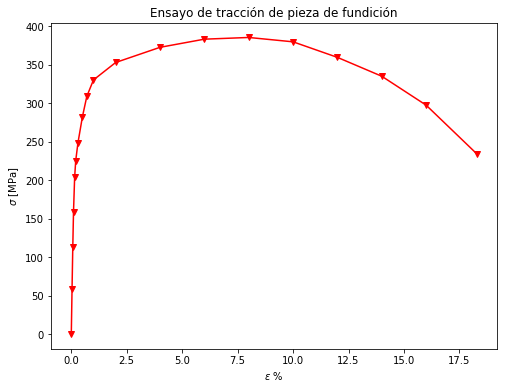

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(epsilon,sigma,'-vr')
ax.axis('tight')
ax.set_title('Ensayo de tracción de pieza de fundición')
ax.set_xlabel(r'$\varepsilon$ %')
ax.set_ylabel(r'$\sigma$ [MPa]');

**b)** También se puede cargar un archivo del formato específico de NumPy. Para esto, primero vamos a salvar un archivo con ese formato y luego lo cargaremos.

In [31]:
np.save("vectorAleatorio.npy", k)
!file vectorAleatorio.npy
k

vectorAleatorio.npy: data


array([ 0.05160227, -0.82069274,  1.69074241,  0.14511965,  1.03635363,
       -0.34523165, -1.26019807,  0.00760806, -2.76216007, -0.02225826,
        0.53313186,  0.31969711,  1.4242149 , -0.32593929, -0.90858835,
        0.75727051,  1.60621588, -0.00587573, -0.5704576 , -0.91098084,
       -0.92479223,  1.74278161, -0.36690724,  2.37513085, -0.23760914,
        0.7447313 ,  1.34977293,  0.62575864, -0.2156977 ,  0.11180155,
        1.64000729,  1.27867362, -0.54257101, -0.78621845,  0.47727519,
       -0.45575472, -0.84707087, -0.96697862,  0.15792113, -0.76485446])

Ahora lo cargamos:

In [32]:
vecAleatorio = np.load("vectorAleatorio.npy")

También lo podemos graficar.

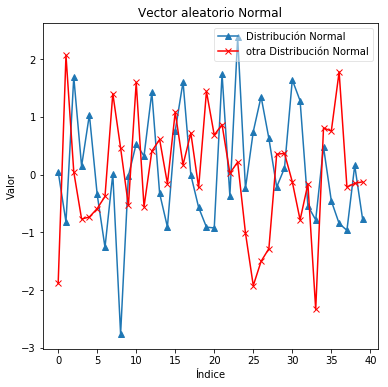

In [33]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(vecAleatorio,'-^',label= 'Distribución Normal')
k1 = np.random.randn(40)
ax.plot(k1,'-xr',label= 'otra Distribución Normal')
ax.axis('tight')
ax.set_title('Vector aleatorio Normal')
ax.set_xlabel('Índice')
ax.set_ylabel('Valor')
plt.legend(framealpha=0.5,loc=1);

En la figura anterior graficamos dos vectores, en azul el que cargamos del archivo y en rojo uno nuevo que generamos.

### Manipulación de arreglos
#### Acceso mediante índices
Si tomamos el vector anterior, podemos acceder a cada elemento mediante corchetes y el índice, por ejemplo:

In [35]:
print(vecAleatorio)
vecAleatorio[8]

[ 0.05160227 -0.82069274  1.69074241  0.14511965  1.03635363 -0.34523165
 -1.26019807  0.00760806 -2.76216007 -0.02225826  0.53313186  0.31969711
  1.4242149  -0.32593929 -0.90858835  0.75727051  1.60621588 -0.00587573
 -0.5704576  -0.91098084 -0.92479223  1.74278161 -0.36690724  2.37513085
 -0.23760914  0.7447313   1.34977293  0.62575864 -0.2156977   0.11180155
  1.64000729  1.27867362 -0.54257101 -0.78621845  0.47727519 -0.45575472
 -0.84707087 -0.96697862  0.15792113 -0.76485446]


-2.7621600675318985

Si en cambio es una matriz como la que definimos antes _M_:

In [43]:
M = np.random.rand(4,4)
print(M)
print(M[0,0])
print(M[0][0])#Es equivalente a la notación anterior
print(M[0,1])

[[ 0.13560214  0.15151627  0.04198093  0.88004341]
 [ 0.20437643  0.33962529  0.06258502  0.2624701 ]
 [ 0.11540283  0.2080168   0.56628247  0.48619874]
 [ 0.63645992  0.3936007   0.97375186  0.31434414]]
0.135602135427
0.135602135427
0.151516274093


O podríamos mostrar una fila:

In [37]:
print(M[4])
M[4].shape

[ 0.32216533  0.9946227   0.64019769  0.28778422  0.36946972]


(5,)

Una forma un poco más correcta es:

In [40]:
M[4,:]#Fila

array([ 0.32216533,  0.9946227 ,  0.64019769,  0.28778422,  0.36946972])

Para una columna:

In [41]:
M[:,1]#Columna

array([ 0.68257013,  0.7915659 ,  0.60910923,  0.70133123,  0.9946227 ])

Se pueden asignar valores a determinados elementos o conjunto de elementos (filas, columnas o parte de ellas).

In [44]:
M[1,1] = 100.0#Al índice 1,1
print('M:\n',M)
M[:,0] = 0.0#Agrego ceros a toda la primer columna
print('M:\n',M)
M[2:4,3] = -10.0#Cambiar los elementos del tercero al quinto de la cuarta columna
print('M:\n',M)

M:
 [[  1.35602135e-01   1.51516274e-01   4.19809274e-02   8.80043412e-01]
 [  2.04376434e-01   1.00000000e+02   6.25850212e-02   2.62470096e-01]
 [  1.15402831e-01   2.08016795e-01   5.66282466e-01   4.86198740e-01]
 [  6.36459915e-01   3.93600696e-01   9.73751865e-01   3.14344139e-01]]
M:
 [[  0.00000000e+00   1.51516274e-01   4.19809274e-02   8.80043412e-01]
 [  0.00000000e+00   1.00000000e+02   6.25850212e-02   2.62470096e-01]
 [  0.00000000e+00   2.08016795e-01   5.66282466e-01   4.86198740e-01]
 [  0.00000000e+00   3.93600696e-01   9.73751865e-01   3.14344139e-01]]
M:
 [[  0.00000000e+00   1.51516274e-01   4.19809274e-02   8.80043412e-01]
 [  0.00000000e+00   1.00000000e+02   6.25850212e-02   2.62470096e-01]
 [  0.00000000e+00   2.08016795e-01   5.66282466e-01  -1.00000000e+01]
 [  0.00000000e+00   3.93600696e-01   9.73751865e-01  -1.00000000e+01]]


#### Rebanado
Con vectores podemos hacer lo siguiente:

In [45]:
a = np.arange(10)
print('Original a:',a)
a[2:9:3] # [start:end:step]


Original a: [0 1 2 3 4 5 6 7 8 9]


array([2, 5, 8])

In [46]:
a[:5]#El último no está incluido

array([0, 1, 2, 3, 4])

In [47]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [48]:
a[-1]#Último elemento

9

In [49]:
a[::-1]#Invierto

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [51]:
a[::-2]#Invierto y remuestreo

array([9, 7, 5, 3, 1])

In [ ]:
a[-3:]#Últimos tres elementos

Para matrices, más o menos similar:

In [50]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [52]:
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

#### Indexado Fancy
Se denomina indexado fancy cuando un arreglo o una lista se utiliza en lugar de un índice. Algunos ejemplos de este tipo de indexado:

In [54]:
indices_filas = [2, 3]#Tercer y cuarta fila
A[indices_filas,:]

array([[20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [55]:
indices_columnas= [1, -1]#Segunda columna y última
A[:,indices_columnas]

array([[ 1,  4],
       [11, 14],
       [21, 24],
       [31, 34],
       [41, 44]])

También se pueden enmascarar algunos elementos con variables booleanas:

In [56]:
b = np.array([n for n in range(5)])
b

array([0, 1, 2, 3, 4])

In [57]:
mascara = np.array([True, False, True, False, False])
b[mascara]

array([0, 2])

Mejor que pasarle a mano estas variables se pueden utilizar inecuaciones:

In [58]:
mascara = b < 2
print(mascara.dtype)
bmenor2 = b[mascara]
bmenor2

bool


array([0, 1])

In [59]:
c = np.array([n for n in range(20)])
print(c)
mascara = (c < 10) & (c % 2 == 0) #Menores que diez divisibles por dos
c[mascara]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([0, 2, 4, 6, 8])

### Operaciones por elemento
#### Aritméticas
Suma con un escalar:

In [60]:
print(A)
A+100

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([[100, 101, 102, 103, 104],
       [110, 111, 112, 113, 114],
       [120, 121, 122, 123, 124],
       [130, 131, 132, 133, 134],
       [140, 141, 142, 143, 144]])

Suma de elemento a elemento:

In [61]:
A+A

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

Producto elemento a elemento (cuidado no es producto de matrices):

In [64]:
B = np.ones_like(A)
B[0,1] = 10
print(A)
print(B)
A*B

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 1 10  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]


array([[ 0, 10,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Para multiplicar matrices se usar [matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul)):

In [65]:
B = np.eye(2)+np.diag([2],k=-1)
print(B)
C = np.ones((2, 2)) * 2+3*np.eye(2)
print(C)
np.matmul(B,C)

[[ 1.  0.]
 [ 2.  1.]]
[[ 5.  2.]
 [ 2.  5.]]


array([[  5.,   2.],
       [ 12.,   9.]])

Para comparar elementos se pueden utilizar <, >, ==, etc.:

In [66]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a==b

array([False,  True, False,  True], dtype=bool)

También se puede comparar el arreglo completo:

In [67]:
np.array_equal(a,b)

False

In [68]:
np.array_equal(a,a)

True

También existen otras operaciones lógicas como logical_or y logical_and para esto los arreglos deben ser booleanos:

In [69]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False], dtype=bool)

#### Funciones
Existen varias funciones implementadas en numpy. Trigonométricas, estadísticas (ya vimos mean(), std()), etc.

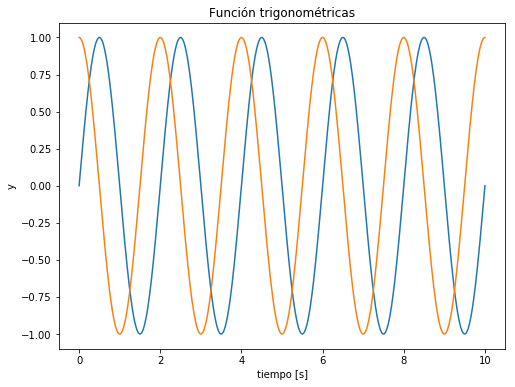

In [74]:
t = np.linspace(0., 10., 1000)
f = 0.5 #Frecuencia 0.5 Hz
y = np.sin(2*np.pi*f*t)
y2 = np.cos(2*np.pi*f*t)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t,y)
ax.plot(t,y2)
ax.axis('tight')
ax.set_title('Función trigonométricas')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('y');

Algunas operaciones conocidas como reducciones:

In [78]:
x = np.array([1, 2, 3, 4])
x.sum()#también funciona np.sum(x)

10

Se pueden sumar los diferentes ejes:

In [79]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print('Matriz original:\n',a)
print('Por columnas:\n',a.sum(axis=0))
print('Por filas:\n',a.sum(axis=1))

Matriz original:
 [[ 1.  2.]
 [ 3.  4.]]
Por columnas:
 [ 4.  6.]
Por filas:
 [ 3.  7.]


Otro tipo de funciones y reducciones (también se pueden hacer por eje):

In [81]:
print(a)
a.min(axis=0)

[[ 1.  2.]
 [ 3.  4.]]


array([ 1.,  2.])

In [82]:
x = np.array([10, 20, 8, 9])
print('mínimo:',x.min())
print('posición mínimo:',x.argmin())

mínimo: 8
posición mínimo: 2


Operaciones lógicas y comparaciones:

In [ ]:
np.any(x==8)

In [ ]:
np.all(x==8)

Se puede manipular la forma de un arreglo. Aquí van unas funciones útiles.

Aplanamiento:

In [83]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

Reshape:

In [84]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

Algunas cosas más raras:

In [ ]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a

Se puede ordenar:

In [ ]:
a = np.array([[4, 3, 5], [1, 2, 1]])
print(a)
b = np.sort(a, axis=1)
b

#### Álgebra lineal
También se pueden realizar algunos cálculos de __*álgebra lineal*__. Para esto se deben acceder a algunas funciones de [np.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Aquí un ejemplo:

$Ax = b$

In [85]:
A = np.array([[1.0, 2.0], [3.0, 4.0]])
print('Matriz original:\n',A)
print('Matriz transpuesta:\n',A.transpose())#También funciona A.T
print('Inversa de la Matriz:\n',np.linalg.inv(A))
print('Verificamos:\n',np.matmul(A,np.linalg.inv(A)))
b = np.array([[5.], [7.]])
print('Solución del sistema lineal (despejamos x):\n',np.linalg.solve(A, b))

Matriz original:
 [[ 1.  2.]
 [ 3.  4.]]
Matriz transpuesta:
 [[ 1.  3.]
 [ 2.  4.]]
Inversa de la Matriz:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Verificamos:
 [[  1.00000000e+00   1.11022302e-16]
 [  0.00000000e+00   1.00000000e+00]]
Solución del sistema lineal (despejamos x):
 [[-3.]
 [ 4.]]


#### Histogramas
Se pueden construir histogramas muy facilmente con ayuda de matplotlib. Un ejemplo de un histograma de una variable aleatoria con distribución Normal.

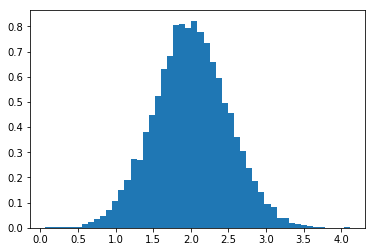

In [86]:
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
plt.hist(v, bins=50, density=1);

In [ ]:
(n, bins) = np.histogram(v, bins=50, density=True)  # Con la versión de NumPy
plt.plot(.5*(bins[1:]+bins[:-1]), n);

#### Interpolación (fitting)
Con NumPy también podemos realizar una interpolación con polinomios y otras funciones. Continuaremos con el ejemplo del ensayo de tracción y estimaremos el módulo de elasticidad. Utilizaremos la función [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html).

[ 1364.04403053    11.18908872] <class 'numpy.ndarray'>
Módulo de elasticidad E = 111.89088718  GPa


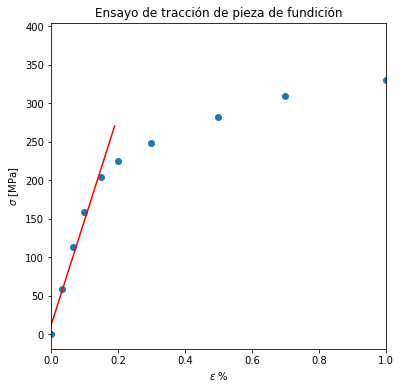

In [93]:
F,L = np.loadtxt('datos.dat', usecols=(0,1),comments='#',delimiter=',', unpack=True)
epsilon = 100.*(L-L[0])/L[0] #Normalizando la deformación en %
A0 = 4.8e-3*16.9e-3 #Sección 
sigma = F/(A0*1e6) #Obteniendo el esfuerzo en MPa
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(epsilon,sigma,'o')
ax.axis('tight')
ax.set_title('Ensayo de tracción de pieza de fundición')
ax.set_xlabel(r'$\varepsilon$ %')
ax.set_ylabel(r'$\sigma$ [MPa]')
p = np.polyfit(epsilon[:5], sigma[:5], 1)
print(p,type(p))
sigma_est = np.polyval(p, np.arange(-0.5,.2,0.01))
ax.plot(np.arange(-0.5,.2,0.01),sigma_est,'r');
ax.set_xlim(0,1)
print('Módulo de elasticidad E =',p[1]/(100*1e-3),' GPa')